# This serves as the first portion of our team's solution for the geophycics competition. Thanks to Altay Sancal Eduardo Alvarez, Ayo Babalola, Kyle Jones, Liz Dennett and Dan Kahn.


# Synthetic data is generated as follows: 
* 1) generate wavelet using provided six wells and seismic data.
* 2) use horizons and well logs to generate initial model.
* 3) Use linearized AVO equation to geneate synthetics. To obtain better permance for subsquent neural network training, we used a least square fitted intial model to generate synthetics.
* 4) A post stack trace d(w)=R(w)*W(w), where d(w) is the seismic trace, R(w) is the reflectivity, W(w) is the wavelet. 
* 5) For prestack trace, the angle dependent reflectivity can be calculated as:  
    Rpp(seta)=(0.5+0.5tan^2(seta))xdelta(Vp)/Vp-4(sin^2(seta)delta(Vs)/Vs**Vs^2/Vp^2+(0.5-2sin^2(seta)Vs^2/Vp^2)*delta(rho)/rho

# Before running this notebook, you should install package "segyio' in order to read sgy file

In [ ]:
# ! pip install segyio

In [1]:
import segyio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

## Augumented Synthetic Seismic QC (only for near and mid stack)

#### Read in the synthetic segy file

In [95]:
near_stk_path = 's_n_0.5.sgy'
mid_stk_path = 's_m_0.5.sgy'

seismic_path = [near_stk_path, mid_stk_path]


#### Select one trace location to QC

In [96]:
synthetic_read = []

for path in seismic_path:
    print("Now reading: " + path)
    
    with segyio.open(path, iline = 181, xline = 185) as segyfile:      

        # Memory map file for faster reading (especially if file is big...)
        segyfile.mmap()

        # Print binary header info
        print("Header information:")
        print(segyfile.bin)
        print(segyfile.bin[segyio.BinField.Traces])

        # Read headerword inline for trace 10
    #     print(segyfile.header[10][segyio.TraceField.INLINE_3D])


        print("----------------------------------")
        # Print inline and crossline ranges
        print("Xline ranges:")
        print(segyfile.xlines)
        print("Iline ranges:")
        print(segyfile.ilines)

        #Select the desired trace
        print("----------------------------------")
        selected_il = segyfile.ilines[3]
        selected_xl = segyfile.xlines[3]
        print("selected iline: ", selected_il)
        print("selected xline: ", selected_xl)

        selected_xl_trace = segyfile.xline[selected_xl]
        selected_single_trace = selected_xl_trace[3]
        synthetic_read.append(selected_single_trace)


        print("----------------------------------")

Now reading: s_n_0.5.sgy
Header information:
{JobID: 9999, LineNumber: 9999, ReelNumber: 1, Traces: 14, AuxTraces: 0, Interval: 500, IntervalOriginal: 0, Samples: 3601, SamplesOriginal: 451, Format: 1, EnsembleFold: 1, SortingCode: 1, VerticalSum: 1, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, Sweep: 0, SweepChannel: 0, SweepTaperStart: 0, SweepTaperEnd: 0, Taper: 0, CorrelatedTraces: 2, BinaryGainRecovery: 1, AmplitudeRecovery: 4, MeasurementSystem: 1, ImpulseSignalPolarity: 0, VibratoryPolarity: 0, ExtAuxTraces: 0, ExtSamples: 0, ExtSamplesOriginal: 0, ExtEnsembleFold: 0, SEGYRevision: 1, SEGYRevisionMinor: 0, TraceFlag: 1, ExtendedHeaders: 0}
14
----------------------------------
Xline ranges:
[1391 1491 1591 1691 1791 1891 1991 2091 2191 2291 2391 2491 2591 2691]
Iline ranges:
[2405 2455 2505 2555 2605 2655 2705 2755 2805 2855 2905 2955 3005 3055
 3105 3155 3205 3255]
----------------------------------
selected iline:  2555
selected xline:  1691
------------------

#### Overlay the near and mid stack trace to QC

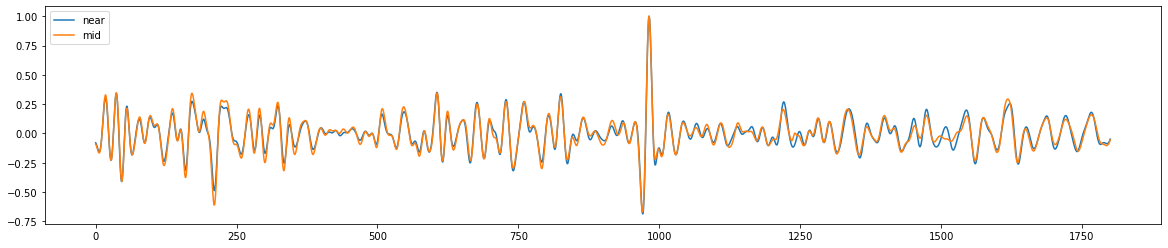

In [103]:
# plot a trace at random location to check the shape

plt.subplots(figsize = (20,4))
# do some simple scaling
for item_trace in synthetic_read:
    time_window = np.arange(0,len(item_trace))/2
    plt.plot(time_window, item_trace/item_trace.max())
    
plt.legend(loc='upper left', labels =['near', 'mid'])

## Augumented Synthetic Well log QC

#### Read in the synthetic well log segy file

In [107]:
density_path = 's_den_0.5.sgy'
zp_path = 's_zp_0.5.sgy'
zs_path = 's_zs_0.5.sgy'

synthetic_log_path = [density_path, zp_path, zs_path]


#### Select one trace location to QC

In [108]:
synthetic_log_read = []

for path in synthetic_log_path:
    print("Now reading: " + path)
    
    with segyio.open(path, iline = 181, xline = 185) as segyfile:      

        # Memory map file for faster reading (especially if file is big...)
        segyfile.mmap()

        # Print binary header info
        print("Header information:")
        print(segyfile.bin)
        print(segyfile.bin[segyio.BinField.Traces])

        # Read headerword inline for trace 10
    #     print(segyfile.header[10][segyio.TraceField.INLINE_3D])


        print("----------------------------------")
        # Print inline and crossline ranges
        print("Xline ranges:")
        print(segyfile.xlines)
        print("Iline ranges:")
        print(segyfile.ilines)

        #Select the desired trace
        print("----------------------------------")
        selected_il = segyfile.ilines[-1]
        selected_xl = segyfile.xlines[0]
        print("selected iline: ", selected_il)
        print("selected xline: ", selected_xl)

        selected_xl_trace = segyfile.xline[selected_xl]
        print(selected_xl_trace.shape)
        selected_single_trace = selected_xl_trace[0]
        synthetic_log_read.append(selected_single_trace)


        print("----------------------------------")

Now reading: s_den_0.5.sgy
Header information:
{JobID: 9999, LineNumber: 9999, ReelNumber: 1, Traces: 120, AuxTraces: 0, Interval: 500, IntervalOriginal: 0, Samples: 3601, SamplesOriginal: 451, Format: 1, EnsembleFold: 1, SortingCode: 2, VerticalSum: 1, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, Sweep: 0, SweepChannel: 0, SweepTaperStart: 0, SweepTaperEnd: 0, Taper: 0, CorrelatedTraces: 2, BinaryGainRecovery: 1, AmplitudeRecovery: 4, MeasurementSystem: 1, ImpulseSignalPolarity: 0, VibratoryPolarity: 0, ExtAuxTraces: 0, ExtSamples: 0, ExtSamplesOriginal: 0, ExtEnsembleFold: 0, SEGYRevision: 1, SEGYRevisionMinor: 0, TraceFlag: 1, ExtendedHeaders: 0}
120
----------------------------------
Xline ranges:
[1391 1491 1591 1691 1791 1891 1991 2091 2191 2291 2391 2491 2591 2691]
Iline ranges:
[2405 2455 2505 2555 2605 2655 2705 2755 2805 2855 2905 2955 3005 3055
 3105 3155 3205 3255]
----------------------------------
selected iline:  3255
selected xline:  1391
(18, 3601)
---

#### Overlay the zp, zs and density to QC

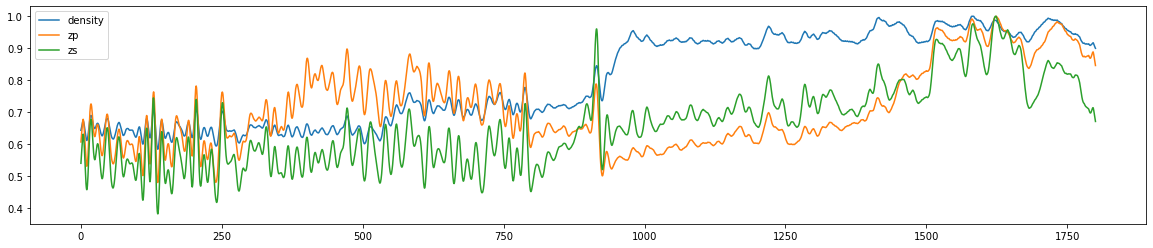

In [109]:
# the log at random location to check the shape

# Apply scaling in order to display three logs in one chart

plt.subplots(figsize = (20,4))
# do some simple scaling
for item_trace in synthetic_log_read:
    time_window = np.arange(0,len(item_trace))/2
    plt.plot(time_window, item_trace/item_trace.max())
    
# plt.xlim(2400,3500)
plt.legend(loc='upper left', labels =['density', 'zp', 'zs'])

# Saving those data as augumented training dataset

### Loading all the augumented synthetic seismic traces

In [206]:
near_stk_path = 's_n_0.5.sgy'
mid_stk_path = 's_m_0.5.sgy'

seismic_path = [near_stk_path, mid_stk_path]

In [123]:
synthetic_seismic_read = []

for path in seismic_path:
    print("Now reading: " + path)
    
    with segyio.open(path, iline = 181, xline = 185) as segyfile:      

        segyfile.mmap()

        print("----------------------------------")
        # Print inline and crossline ranges
        print("Xline ranges:")
        print(segyfile.xlines)
        print("Iline ranges:")
        print(segyfile.ilines)

        #Select the desired trace
        print("----------------------------------")
        inline_range = segyfile.ilines
        xline_range = segyfile.xlines
        
     
        trace_allframe = pd.DataFrame()
        
        for il_index, il in enumerate(inline_range):
            for xl_index, xl in enumerate(xline_range):
                print("Now processing IL: {} and XL: {}".format(il,xl))
                trace = segyfile.iline[il][xl_index]
                trace_currentframe = pd.DataFrame(data = trace, columns = ['amplitude'])
                trace_currentframe['inline'] = il
                trace_currentframe['xline'] = xl
                trace_allframe = pd.concat([trace_allframe, trace_currentframe], axis = 0)
      
        print(trace_allframe.head())
        print(trace_allframe.shape)
        

        synthetic_seismic_read.append(trace_allframe)

        print("----------------------------------")

Now reading: s_n_0.5.sgy
----------------------------------
Xline ranges:
[1391 1491 1591 1691 1791 1891 1991 2091 2191 2291 2391 2491 2591 2691]
Iline ranges:
[2405 2455 2505 2555 2605 2655 2705 2755 2805 2855 2905 2955 3005 3055
 3105 3155 3205 3255]
----------------------------------
Now processing IL: 2405 and XL: 1391
Now processing IL: 2405 and XL: 1491
Now processing IL: 2405 and XL: 1591
Now processing IL: 2405 and XL: 1691
Now processing IL: 2405 and XL: 1791
Now processing IL: 2405 and XL: 1891
Now processing IL: 2405 and XL: 1991
Now processing IL: 2405 and XL: 2091
Now processing IL: 2405 and XL: 2191
Now processing IL: 2405 and XL: 2291
Now processing IL: 2405 and XL: 2391
Now processing IL: 2405 and XL: 2491
Now processing IL: 2405 and XL: 2591
Now processing IL: 2405 and XL: 2691
Now processing IL: 2455 and XL: 1391
Now processing IL: 2455 and XL: 1491
Now processing IL: 2455 and XL: 1591
Now processing IL: 2455 and XL: 1691
Now processing IL: 2455 and XL: 1791
Now proce

In [125]:
synthetic_seismic_read[0].shape

(907452, 3)

### Edit the feature name 

In [128]:
synthetic_seismic_read[0] = synthetic_seismic_read[0].rename(columns = {'amplitude': 'near_composite'})
synthetic_seismic_read[1] = synthetic_seismic_read[1].rename(columns = {'amplitude': 'mid_composite'})

#### Add 'twt' into the feature

In [126]:
twt_single = np.arange(0,3601)/2
twt = twt_single.copy()
for i in range(1,int(907452/3601)):
    twt = np.concatenate((twt, twt_single), axis=0)
twt.shape

(907452,)

In [139]:
synthetic_seismic_df = pd.concat([synthetic_seismic_read[0], synthetic_seismic_read[1]], axis = 1)
synthetic_seismic_df['twt'] = twt
synthetic_seismic_df['twt'] = synthetic_seismic_df['twt'] + 1800
synthetic_seismic_df = synthetic_seismic_df.loc[:,~synthetic_seismic_df.columns.duplicated()]
synthetic_seismic_df = synthetic_seismic_df[['twt', 'inline', 'xline', 'near_composite', 'mid_composite']]
print(synthetic_seismic_df.shape)
synthetic_seismic_df.head()

(907452, 5)


,twt,inline,xline,near_composite,mid_composite
0,1800.0,2405,1391,-985.627930,127.359253
1,1800.5,2405,1391,1054.916992,1782.068359
2,1801.0,2405,1391,3534.478271,3791.224365
3,1801.5,2405,1391,6353.742188,6073.476562
4,1802.0,2405,1391,9383.953125,8523.515625


### Add velocity into the feature

In [144]:
from rss.client import rssFromS3

#### Read velocity RSS file from S3 bucket

In [147]:
seismic_bucket = r's3://sagemaker-gitc2021/poseidon/seismic/rss/'

seismic_file = 'Final_PSDM_intVel_gridded_D2T_10ms'  # PSDM interval velocities in time

current_rss = rssFromS3(filename=seismic_bucket + seismic_file, client_kwargs={})

Connection complete.


### Extract the velocity value at those synthetic seismic locations

#### Orignal velocity volume has sample of 10ms. Reampling and interpolation are needed to convert it to 0.5ms sample rate

In [171]:
velocity_allframe = pd.DataFrame()

velocity_twt = pd.DataFrame(np.arange(1800.0, 3610.0, 10.0), columns=['twt'])

resamp_twt = pd.DataFrame(np.arange(1800.0, 3600.5, 0.5), columns=['twt'])


for il_index, il in enumerate(inline_range):
    for xl_index, xl in enumerate(xline_range):
        print("Now processing IL: {} and XL: {}".format(il,xl))
        velocity_trace, _ = current_rss.trace(il, xl)
        velocity_trace = velocity_trace[180:361]
        
        current_velocity_frame = pd.DataFrame(velocity_trace, columns=['velocity_composite'])
        tt_velocity = pd.concat([velocity_twt, current_velocity_frame], axis=1)
        velocity_concat_resamp_raw = tt_velocity.merge(resamp_twt, how='right', on=['twt'])
        velocity_concat_resamp_interp = velocity_concat_resamp_raw.interpolate(method='cubic', limit_direction='forward', axis=0)
        velocity_concat_resamp_interp = velocity_concat_resamp_interp.fillna(velocity_concat_resamp_interp['velocity_composite'].mean())


        velocity_allframe = pd.concat([velocity_allframe, velocity_concat_resamp_interp], axis = 0)
        

print(velocity_allframe.head())
print(velocity_allframe.shape)

Now processing IL: 2405 and XL: 1391
Now processing IL: 2405 and XL: 1491
Now processing IL: 2405 and XL: 1591
Now processing IL: 2405 and XL: 1691
Now processing IL: 2405 and XL: 1791
Now processing IL: 2405 and XL: 1891
Now processing IL: 2405 and XL: 1991
Now processing IL: 2405 and XL: 2091
Now processing IL: 2405 and XL: 2191
Now processing IL: 2405 and XL: 2291
Now processing IL: 2405 and XL: 2391
Now processing IL: 2405 and XL: 2491
Now processing IL: 2405 and XL: 2591
Now processing IL: 2405 and XL: 2691
Now processing IL: 2455 and XL: 1391
Now processing IL: 2455 and XL: 1491
Now processing IL: 2455 and XL: 1591
Now processing IL: 2455 and XL: 1691
Now processing IL: 2455 and XL: 1791
Now processing IL: 2455 and XL: 1891
Now processing IL: 2455 and XL: 1991
Now processing IL: 2455 and XL: 2091
Now processing IL: 2455 and XL: 2191
Now processing IL: 2455 and XL: 2291
Now processing IL: 2455 and XL: 2391
Now processing IL: 2455 and XL: 2491
Now processing IL: 2455 and XL: 2591
N

### Merge velocity and synthetic seismic into one dataframe

In [193]:
synthetic_seismic_df['velocity_composite'] = velocity_allframe['velocity_composite']
synthetic_seismic_df['well_name'] = 'synthetic'
print(synthetic_seismic_df.shape)
synthetic_seismic_df.head()

(907452, 7)


,twt,inline,xline,near_composite,mid_composite,velocity_composite,well_name
0,1800.0,2405,1391,-985.627930,127.359253,3692.045259,synthetic
1,1800.5,2405,1391,1054.916992,1782.068359,3697.428841,synthetic
2,1801.0,2405,1391,3534.478271,3791.224365,3702.852790,synthetic
3,1801.5,2405,1391,6353.742188,6073.476562,3708.315649,synthetic
4,1802.0,2405,1391,9383.953125,8523.515625,3713.815957,synthetic


In [194]:
# Save synthetic seismic into a csv file

synthetic_seismic_df.to_csv('synthetic_seismic_new_0425.csv')

### Loading all the augumented synthetic logs

In [175]:
density_path = 's_den_0.5.sgy'
zp_path = 's_zp_0.5.sgy'
zs_path = 's_zs_0.5.sgy'

synthetic_log_path = [density_path, zp_path, zs_path]

In [188]:
synthetic_log_read = []

for path in synthetic_log_path:
    print("Now reading: " + path)
    
    with segyio.open(path, iline = 181, xline = 185) as segyfile:      

        segyfile.mmap()


        print("----------------------------------")
        # Print inline and crossline ranges
        print("Xline ranges:")
        print(segyfile.xlines)
        print("Iline ranges:")
        print(segyfile.ilines)

        #Select the desired trace
        print("----------------------------------")
        inline_range = segyfile.ilines
        xline_range = segyfile.xlines
        
        trace_allframe = pd.DataFrame()
        
        for il_index, il in enumerate(inline_range):
            for xl_index, xl in enumerate(xline_range):
                print("Now processing IL: {} and XL: {}".format(il,xl))
                trace = segyfile.iline[il][xl_index]
                trace_currentframe = pd.DataFrame(data = trace, columns = ['amplitude'])
                trace_currentframe['inline'] = il
                trace_currentframe['xline'] = xl
                trace_allframe = pd.concat([trace_allframe, trace_currentframe], axis = 0)

        
        print(trace_allframe.head())
        print(trace_allframe.shape)

        synthetic_log_read.append(trace_allframe)


        print("----------------------------------")

Now reading: s_den_0.5.sgy
----------------------------------
Xline ranges:
[1391 1491 1591 1691 1791 1891 1991 2091 2191 2291 2391 2491 2591 2691]
Iline ranges:
[2405 2455 2505 2555 2605 2655 2705 2755 2805 2855 2905 2955 3005 3055
 3105 3155 3205 3255]
----------------------------------
Now processing IL: 2405 and XL: 1391
Now processing IL: 2405 and XL: 1491
Now processing IL: 2405 and XL: 1591
Now processing IL: 2405 and XL: 1691
Now processing IL: 2405 and XL: 1791
Now processing IL: 2405 and XL: 1891
Now processing IL: 2405 and XL: 1991
Now processing IL: 2405 and XL: 2091
Now processing IL: 2405 and XL: 2191
Now processing IL: 2405 and XL: 2291
Now processing IL: 2405 and XL: 2391
Now processing IL: 2405 and XL: 2491
Now processing IL: 2405 and XL: 2591
Now processing IL: 2405 and XL: 2691
Now processing IL: 2455 and XL: 1391
Now processing IL: 2455 and XL: 1491
Now processing IL: 2455 and XL: 1591
Now processing IL: 2455 and XL: 1691
Now processing IL: 2455 and XL: 1791
Now pro

In [182]:
synthetic_log_read[0].shape

(907452, 3)

In [189]:
synthetic_log_read[0] = synthetic_log_read[0].rename(columns = {'amplitude': 'rhob'})
synthetic_log_read[1] = synthetic_log_read[1].rename(columns = {'amplitude': 'Zp'})
synthetic_log_read[2] = synthetic_log_read[2].rename(columns = {'amplitude': 'Zs'})

In [184]:
twt_single = np.arange(0,3601)/2
twt = twt_single.copy()
for i in range(1,int(907452/3601)):
    twt = np.concatenate((twt, twt_single), axis=0)
twt.shape

(907452,)

### Edit the feature name

#### Add 'twt' into the feature

In [190]:
synthetic_log_df = pd.concat([synthetic_log_read[0], synthetic_log_read[1],synthetic_log_read[2]], axis = 1)
synthetic_log_df['twt'] = twt
synthetic_log_df['twt'] = synthetic_log_df['twt'] + 1800
synthetic_log_df = synthetic_log_df.loc[:,~synthetic_log_df.columns.duplicated()]
synthetic_log_df = synthetic_log_df[['twt', 'inline', 'xline', 'rhob', 'Zp', 'Zs']]
print(synthetic_log_df.shape)
synthetic_log_df.head()

(907452, 6)


,twt,inline,xline,rhob,Zp,Zs
0,1800.0,2405,1391,1.735296,7838.355469,4467.332031
1,1800.5,2405,1391,1.745203,7960.687500,4568.414062
2,1801.0,2405,1391,1.756828,8101.320312,4684.218750
3,1801.5,2405,1391,1.769448,8251.039062,4807.156250
4,1802.0,2405,1391,1.782191,8399.195312,4928.546875


In [195]:
synthetic_log_selected_df = synthetic_log_df[['twt', 'Zp', 'Zs', 'rhob']]
synthetic_log_selected_df['well_name'] = 'synthetic'
synthetic_log_selected_df

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,twt,Zp,Zs,rhob,well_name
0,1800.0,7838.355469,4467.332031,1.735296,synthetic
1,1800.5,7960.687500,4568.414062,1.745203,synthetic
2,1801.0,8101.320312,4684.218750,1.756828,synthetic
3,1801.5,8251.039062,4807.156250,1.769448,synthetic
4,1802.0,8399.195312,4928.546875,1.782191,synthetic
...,...,...,...,...,...
3596,3598.0,8525.148438,5191.019531,2.409767,synthetic
3597,3598.5,8389.394531,5056.488281,2.393085,synthetic
3598,3599.0,8257.636719,4928.312500,2.377434,synthetic
3599,3599.5,8137.375000,4812.960938,2.363611,synthetic


In [196]:
# save the synthetic log in to a csv file

synthetic_log_selected_df.to_csv('synthetic_log_new_0425.csv')